In [6]:
import os
import re
from pydub import AudioSegment
import pandas as pd
import pylab as plt
import random
from tqdm import tqdm
from datasets import Dataset, DatasetDict, Audio, load_dataset, concatenate_datasets
import json
import sys
sys.path.append('..')
import speech_utils as su

ds_cmu, ds_google, ds_fleurs, ds_common_voice, ds_ps, ds_shrutilipi, ds_indicsuperb, ds_indicvoice, ds_indictts, ds_sttyt = None, None, None, None, None, None, None, None, None, None

all_dts = ['cmu_synth', 'google_synth', 'fleurs', 'common_voice', 'pa_lab_corpus', 'shrutilipi', 'indicsuperb', 'indic_voice', 'indictts', 'stt_yt']
use_dts = ['cmu_synth', 'google_synth', 'fleurs', 'common_voice', 'pa_lab_corpus', 'shrutilipi', 'indicsuperb', 'indic_voice', 'indictts']
output_ds_name = 'all_except_stt_yt'
indicvoice_transcript_type = 'normalized'
def get_duration(x):
    x['duration'] = len(x['audio']['array']) / x['audio']['sampling_rate']
    x['speaker_id'] = None
    return x

/home/kd/Desktop/proj/apr/Punjabi_ASR/ds_processing/../speech_utils.py:13: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  wer_metric = load_metric("wer")
/home/kd/anaconda3/envs/ai4bharat/lib/python3.12/site-packages/datasets/load.py:759: FutureWarning: The repository for wer contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/wer/wer.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


##### We are not goona use Shrutilipi, IndicSuperb and IndicTTS Dataset because it requires further filtering and cleaning

#### CMU Synth and Google Synth

In [7]:
if 'cmu_synth' in use_dts and 'google_synth' in use_dts:
    base_dir_cmu = '/mnt/data/Speech Dataset/CMUSynth/CMU-synth/'
    clips_cmu = f'{base_dir_cmu}clips/'

    base_dir_google = '/mnt/data/Speech Dataset/GoogleSynth/Google-synth/'
    clips_google = f'{base_dir_google}clips/'

    cmu_train = pd.read_csv(f'{base_dir_cmu}train.tsv', header=None, sep='\t', names=['audio', 'text'])
    cmu_test = pd.read_csv(f'{base_dir_cmu}test.tsv', header=None, sep='\t', names=['audio', 'text'])
    cmu_valid = pd.read_csv(f'{base_dir_cmu}dev.tsv', header=None, sep='\t', names=['audio', 'text'])

    cmu_train['audio'] = cmu_train['audio'].apply(lambda x: str(x).strip() + '.wav')
    cmu_test['audio'] = cmu_test['audio'].apply(lambda x: str(x).strip() + '.wav')
    cmu_valid['audio'] = cmu_valid['audio'].apply(lambda x: str(x).strip() + '.wav')

    cmu_train['audio'] = clips_cmu + cmu_train['audio']
    cmu_test['audio'] = clips_cmu + cmu_test['audio']
    cmu_valid['audio'] = clips_cmu + cmu_valid['audio']

    google_train = pd.read_csv(f'{base_dir_google}train.tsv', header=None, sep='\t', names=['audio', 'text'])
    google_test = pd.read_csv(f'{base_dir_google}test.tsv', header=None, sep='\t', names=['audio', 'text'])
    google_valid = pd.read_csv(f'{base_dir_google}dev.tsv', header=None, sep='\t', names=['audio', 'text'])

    google_train['audio'] = google_train['audio'].apply(lambda x: str(x).strip() + '.wav')
    google_test['audio'] = google_test['audio'].apply(lambda x: str(x).strip() + '.wav')
    google_valid['audio'] = google_valid['audio'].apply(lambda x: str(x).strip() + '.wav')

    google_train['audio'] = clips_google + google_train['audio']
    google_test['audio'] = clips_google + google_test['audio']
    google_valid['audio'] = clips_google + google_valid['audio']


    cmu_test['duration'] = cmu_test['audio'].apply(lambda x: AudioSegment.from_file(x).duration_seconds)
    cmu_train['duration'] = cmu_train['audio'].apply(lambda x: AudioSegment.from_file(x).duration_seconds)
    cmu_valid['duration'] = cmu_valid['audio'].apply(lambda x: AudioSegment.from_file(x).duration_seconds)

    google_test['duration'] = google_test['audio'].apply(lambda x: AudioSegment.from_file(x).duration_seconds)
    google_train['duration'] = google_train['audio'].apply(lambda x: AudioSegment.from_file(x).duration_seconds)
    google_valid['duration'] = google_valid['audio'].apply(lambda x: AudioSegment.from_file(x).duration_seconds)

    cmu_test['source'] = 'cmu_synth'
    cmu_train['source'] = 'cmu_synth'
    cmu_valid['source'] = 'cmu_synth'

    google_test['source'] = 'google_synth'
    google_train['source'] = 'google_synth'
    google_valid['source'] = 'google_synth'

    cmu_train = cmu_train.reset_index(drop=True)
    cmu_test = cmu_test.reset_index(drop=True)
    cmu_valid = cmu_valid.reset_index(drop=True)

    google_train = google_train.reset_index(drop=True)
    google_test = google_test.reset_index(drop=True)
    google_valid = google_valid.reset_index(drop=True)

    ds_cmu = DatasetDict({'train': Dataset.from_pandas(cmu_train), 'test': Dataset.from_pandas(cmu_test), 'valid': Dataset.from_pandas(cmu_valid)})

    ds_google = DatasetDict({'train': Dataset.from_pandas(google_train), 'test': Dataset.from_pandas(google_test), 'valid': Dataset.from_pandas(google_valid)})

    ds_cmu = ds_cmu.cast_column('audio', Audio(sampling_rate = 16000))
    ds_google = ds_google.cast_column('audio', Audio(sampling_rate = 16000))

    print(ds_cmu)
    print(ds_google)


DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'duration', 'source'],
        num_rows: 63768
    })
    test: Dataset({
        features: ['audio', 'text', 'duration', 'source'],
        num_rows: 7971
    })
    valid: Dataset({
        features: ['audio', 'text', 'duration', 'source'],
        num_rows: 7971
    })
})
DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'duration', 'source'],
        num_rows: 39993
    })
    test: Dataset({
        features: ['audio', 'text', 'duration', 'source'],
        num_rows: 5000
    })
    valid: Dataset({
        features: ['audio', 'text', 'duration', 'source'],
        num_rows: 4999
    })
})


#### Common Voice

In [8]:
if 'common_voice' in use_dts:
    ds_common_voice = load_dataset("mozilla-foundation/common_voice_17_0", 'pa-IN', num_proc=4, cache_dir="../cache_dir/common_voice_17_0")

    ds_common_voice = ds_common_voice.remove_columns(['audio', 'up_votes', 'down_votes', 'age', 'accent', 'locale', 'segment', 'variant', 'client_id', 'gender'])

    ds_common_voice = ds_common_voice.rename_column('sentence', 'text')
    ds_common_voice = ds_common_voice.rename_column('path', 'audio')
    ds_common_voice = ds_common_voice.cast_column('audio', Audio(sampling_rate = 16000))
    ds_common_voice = ds_common_voice.map(get_duration, num_proc=16)
    ds_common_voice = ds_common_voice.map(lambda x: {'source': 'common_voice'}, num_proc=16)

    print(ds_common_voice)

/home/kd/anaconda3/envs/ai4bharat/lib/python3.12/site-packages/datasets/load.py:1486: FutureWarning: The repository for mozilla-foundation/common_voice_17_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_17_0
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'duration', 'speaker_id', 'source'],
        num_rows: 732
    })
    validation: Dataset({
        features: ['audio', 'text', 'duration', 'speaker_id', 'source'],
        num_rows: 286
    })
    test: Dataset({
        features: ['audio', 'text', 'duration', 'speaker_id', 'source'],
        num_rows: 487
    })
    other: Dataset({
        features: ['audio', 'text', 'duration', 'speaker_id', 'source'],
        num_rows: 1388
    })
    invalidated: Dataset({
        features: ['audio', 'text', 'duration', 'speaker_id', 'source'],
        num_rows: 81
    })
    validated: Dataset({
        features: ['audio', 'text', 'duration', 'speaker_id', 'source'],
        num_rows: 1505
    })
})


#### Fleurs

In [9]:
if 'fleurs' in use_dts:
    ds_fleurs = load_dataset("google/fleurs", 'pa_in', cache_dir="../cache_dir/fleurs", )

    ds_fleurs = ds_fleurs.remove_columns(['id', 'num_samples', 'raw_transcription', 'lang_id', 'language', 'lang_group_id', 'path', 'gender'])
    ds_fleurs = ds_fleurs.rename_column('transcription', 'text')
    ds_fleurs = ds_fleurs.map(get_duration, num_proc=16)
    ds_fleurs = ds_fleurs.map(lambda x: {'source': 'fleurs'}, num_proc=16)

    print(ds_fleurs)

/home/kd/anaconda3/envs/ai4bharat/lib/python3.12/site-packages/datasets/load.py:1486: FutureWarning: The repository for google/fleurs contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/google/fleurs
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'duration', 'speaker_id', 'source'],
        num_rows: 1923
    })
    validation: Dataset({
        features: ['audio', 'text', 'duration', 'speaker_id', 'source'],
        num_rows: 251
    })
    test: Dataset({
        features: ['audio', 'text', 'duration', 'speaker_id', 'source'],
        num_rows: 574
    })
})


### IndicVoice


In [10]:
if 'indic_voice' in use_dts:
    dir = '/mnt/data/Speech Dataset/IndicVoices/Punjabi/v1a'
    train_dir = dir + '/train'
    valid_dir = dir + '/valid'
    def get_files(dir):
        audio_files = []
        for root, dirs, files in os.walk(dir):
            for file in files:
                if file.endswith('.wav'):
                    audio_files.append(file)
        json_files = [file.replace('.wav', '.json') for file in audio_files]
        return audio_files, json_files

    train_audio_files, train_json_files = get_files(train_dir)
    valid_audio_files, valid_json_files = get_files(valid_dir)

    def split_transcriptions(data, wav_file_path):
        audio_splits = []
        for transcription in data[indicvoice_transcript_type]: # normalized, verbatim
            transcription['text'] = re.sub(r"\[.*?\]", "", transcription["text"])
            transcription['text'] = re.sub(r"\s+", " ", transcription['text']).strip()
            audio_splits.append({
                "start": transcription["start"],
                "end": transcription["end"],
                "text": transcription["text"]
            })

        return {
            "full_audio_filepath": wav_file_path,
            "transcriptions": audio_splits,
        }

    def split_audio(data_item, dir_split, split):
        audio_chunks = []

        # uncomment the lines in the function - Since in this case it's already processed. I just metadata
        # audio = AudioSegment.from_wav(f'{dir}/{split}/{data_item['full_audio_filepath']}')
        for i, data in enumerate(data_item['transcriptions']):
            start = data['start']
            end = data['end']
            text = data['text']
            start_ms = start * 1000
            end_ms = end * 1000
            # audio_chunk = audio[start_ms:end_ms]
            chunk_filename = f"{data_item['full_audio_filepath'].replace('.wav', '')}_{i}.wav"
            
            audio_file_path = f'{dir}/{dir_split}/{chunk_filename}'
            # audio_chunk.export(audio_file_path, format="wav")

            d = {
                'audio': audio_file_path,
                'text': text,
            }

            audio_chunks.append(d) 

        return audio_chunks

    def get_audio_chunks(dataset, dir_split, split):
        audio_chunks = []
        for data_item in tqdm(dataset):
            audio_chunks.extend(split_audio(data_item, dir_split, split))
        return audio_chunks

    # get all the data from json files
    def get_data(json_files, dir):
        dataset = []
        for json_file in json_files:
            with open(dir + '/' + json_file, 'r') as file:
                data = json.load(file)
                dataset.append(split_transcriptions(data, json_file.replace('.json', '.wav')))
        return dataset

    train_dataset = get_data(train_json_files, train_dir)
    valid_dataset = get_data(valid_json_files, valid_dir)

    train_audio_chunks = get_audio_chunks(train_dataset, 'train_split_chunks', 'train')
    valid_audio_chunks = get_audio_chunks(valid_dataset, 'valid_split_chunks', 'valid')

    def get_duration_and_source(x):
        x['duration'] = AudioSegment.from_file(x['audio']).duration_seconds
        x['source'] = 'indic_voice'
        return x
    
    train_audio_chunks = [get_duration_and_source(x) for x in train_audio_chunks]
    valid_audio_chunks = [get_duration_and_source(x) for x in valid_audio_chunks]

    t = Dataset.from_list(train_audio_chunks)
    v = Dataset.from_list(valid_audio_chunks)

    ds_indicvoice = DatasetDict({
        'train': t,
        'valid': v
    })

    ds_indicvoice = ds_indicvoice.cast_column('audio', Audio(sampling_rate = 16000))
    print(ds_indicvoice)


100%|██████████| 54/54 [00:00<00:00, 333567.62it/s]


DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'duration', 'source'],
        num_rows: 32145
    })
    valid: Dataset({
        features: ['audio', 'text', 'duration', 'source'],
        num_rows: 184
    })
})


#### Punjabi Speech Labeled Corpus

In [11]:
if 'pa_lab_corpus' in use_dts:
    dir = '/mnt/data/Speech Dataset/PunjabiSpeech/Punjabi Speech A labeled Speech Corpus'
    clips = '/mnt/data/Speech Dataset/PunjabiSpeech/Punjabi Speech A labeled Speech Corpus/clips/'

    train_tsv_file_path = '/mnt/data/Speech Dataset/PunjabiSpeech/Punjabi Speech A labeled Speech Corpus/train.tsv'
    ps_train_df = pd.read_csv(train_tsv_file_path, sep='\t', header=None)

    valid_tsv_file_path = '/mnt/data/Speech Dataset/PunjabiSpeech/Punjabi Speech A labeled Speech Corpus/dev.tsv'
    ps_valid_df = pd.read_csv(valid_tsv_file_path, sep='\t', header=None)

    test_tsv_file_path = '/mnt/data/Speech Dataset/PunjabiSpeech/Punjabi Speech A labeled Speech Corpus/test.tsv'
    ps_test_df = pd.read_csv(test_tsv_file_path, sep='\t', header=None)

    ps_train_df.columns = ['audio', 'text']
    ps_valid_df.columns = ['audio', 'text']
    ps_test_df.columns = ['audio', 'text']

    ps_train_df['audio'] = ps_train_df['audio'].apply(lambda x: clips +  x.strip() + '.wav')
    ps_valid_df['audio'] = ps_valid_df['audio'].apply(lambda x: clips +  x.strip() + '.wav')
    ps_test_df['audio'] = ps_test_df['audio'].apply(lambda x: clips +  x.strip() + '.wav')

    ps_train_df['source'] = 'pa_lab_corpus'
    ps_valid_df['source'] = 'pa_lab_corpus'
    ps_test_df['source'] = 'pa_lab_corpus'

    ps_train_df['duration'] = ps_train_df['audio'].apply(lambda x: AudioSegment.from_file(x).duration_seconds)
    ps_valid_df['duration'] = ps_valid_df['audio'].apply(lambda x: AudioSegment.from_file(x).duration_seconds)
    ps_test_df['duration'] = ps_test_df['audio'].apply(lambda x: AudioSegment.from_file(x).duration_seconds)

    ds_ps = DatasetDict({
        'train': Dataset.from_pandas(ps_train_df),
        'valid': Dataset.from_pandas(ps_valid_df),
        'test': Dataset.from_pandas(ps_test_df)
    })

    ds_ps = ds_ps.cast_column('audio', Audio(sampling_rate = 16000))
    ds_ps


### Shrutilipi

In [12]:
if 'shrutilipi' in use_dts:    
    ds_shrutilipi = load_dataset("aaparajit02/punjabi-asr", num_proc=2, cache_dir="../datasets/punjabi-asr_DS_Shrutilipi")
    ds_shrutilipi = ds_shrutilipi.remove_columns('english')
    ds_shrutilipi = ds_shrutilipi.rename_column('transcript', 'text')
    ds_shrutilipi = ds_shrutilipi['train']

    res = []
    for i in range(16):
        shard = ds_shrutilipi.shard( 16, i, contiguous=True)
        res.append(shard.map(get_duration, num_proc=16, cache_file_name= f'/mnt/sea/temp/map{i}.cache'))

    ds_shrutilipi = concatenate_datasets(res)
    ds_shrutilipi = ds_shrutilipi.cast_column("audio", Audio(sampling_rate=16000))
    ds_shrutilipi = ds_shrutilipi.map(lambda x: {'source': 'shrutilipi'}, num_proc=16)

    ds_shrutilipi = DatasetDict({'train': ds_shrutilipi})

    print(ds_shrutilipi)


Resolving data files:   0%|          | 0/22 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/22 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'duration', 'speaker_id', 'source'],
        num_rows: 39238
    })
})


### IndicSuperb

In [13]:
if 'indicsuperb' in use_dts:    
    def process_test_valid_split(split_path):
        transcription_file = os.path.join(split_path, transcription_file_name)
        df = pd.read_csv(transcription_file, sep='\t', header=None, names=['audio', 'text'])
        df['audio'] = df['audio'].apply(lambda x: os.path.join(split_path, 'audio', x))
        df['audio'] = df['audio'].apply(lambda x: x.replace('.m4a', '.wav'))
        df['duration'] = df['audio'].apply(lambda x: AudioSegment.from_file(x).duration_seconds)
        df['source'] = 'indicsuperb'
        return df

    noisy_test_known = '/mnt/data/Speech Dataset/indicsuperb/kb_data_noisy_m4a/punjabi/test_known'
    noisy_test = '/mnt/data/Speech Dataset/indicsuperb/kb_data_noisy_m4a/punjabi/test'

    test = '/mnt/data/Speech Dataset/indicsuperb/kb_data_clean_m4a/punjabi/test'
    test_known = '/mnt/data/Speech Dataset/indicsuperb/kb_data_clean_m4a/punjabi/test_known'
    train = '/mnt/data/Speech Dataset/indicsuperb/kb_data_clean_m4a/punjabi/train'
    valid = '/mnt/data/Speech Dataset/indicsuperb/kb_data_clean_m4a/punjabi/valid'

    # it's a tab separated file
    transcription_file_name = 'transcription_n2w.txt'

    indicsuperb_train_ds = Dataset.from_pandas(process_test_valid_split(train))
    indicsuperb_train_ds = indicsuperb_train_ds.cast_column('audio', Audio(sampling_rate = 16000))

    noisy_test_known_ds = Dataset.from_pandas(process_test_valid_split(noisy_test_known))
    noisy_test_known_ds = noisy_test_known_ds.cast_column('audio', Audio(sampling_rate = 16000))
    noisy_test_ds = Dataset.from_pandas(process_test_valid_split(noisy_test))
    noisy_test_ds = noisy_test_ds.cast_column('audio', Audio(sampling_rate = 16000))
    test_ds = Dataset.from_pandas(process_test_valid_split(test))
    test_ds = test_ds.cast_column('audio', Audio(sampling_rate = 16000))
    test_known_ds = Dataset.from_pandas(process_test_valid_split(test_known))
    test_known_ds = test_known_ds.cast_column('audio', Audio(sampling_rate = 16000))
    valid_ds = Dataset.from_pandas(process_test_valid_split(valid))
    valid_ds = valid_ds.cast_column('audio', Audio(sampling_rate = 16000))

    ds_indicsuperb = DatasetDict({
        'train': indicsuperb_train_ds,
        'test': test_ds,
        'test_known': test_known_ds,
        'valid': valid_ds,
        'noisy_test': noisy_test_ds,
        'noisy_test_known': noisy_test_known_ds                                                                     
    })

    print(ds_indicsuperb)


DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'duration'],
        num_rows: 83578
    })
    test: Dataset({
        features: ['audio', 'text', 'duration'],
        num_rows: 1914
    })
    test_known: Dataset({
        features: ['audio', 'text', 'duration'],
        num_rows: 3207
    })
    valid: Dataset({
        features: ['audio', 'text', 'duration'],
        num_rows: 3270
    })
    noisy_test: Dataset({
        features: ['audio', 'text', 'duration'],
        num_rows: 422
    })
    noisy_test_known: Dataset({
        features: ['audio', 'text', 'duration'],
        num_rows: 2226
    })
})


### IndicTTS

In [14]:
if 'indictts' in use_dts:
    dir = '/mnt/sea/speech/'
    d = 'indictts_ds'
    manifest = f'{d}/punjabi/manifest.json' # path in manifest is {d}/punjabi/wavs/

    df = pd.read_json(f'{dir}{manifest}', lines=True)
    df['audio_filepath'] = df['audio_filepath'].apply(lambda x: f'{dir}{x}')
    df = df.rename(columns={'audio_filepath': 'audio'})
    df['source'] = 'indictts'

    ds_indictts = DatasetDict({'train': Dataset.from_pandas(df.reset_index(drop=True))})
    ds_indictts = ds_indictts.cast_column('audio', Audio(sampling_rate = 16000)) 

### STT YT(JT)

In [15]:
if 'stt_yt' in use_dts:
    jt_transcripts = '/mnt/sea/jt_transcripts'
    jt_splits = '/mnt/sea/jt_splits'

    transcript_files = os.listdir(jt_transcripts)
    dirs = [x[:-4] for x in transcript_files]

    df = pd.DataFrame()
    for d in dirs:
        df = pd.concat([df, pd.read_csv(os.path.join(jt_transcripts, d + '.csv'))])

    df['audio'] = df.apply(lambda x: os.path.join(jt_splits, f"{x['id']}/{x['id']}__{x['chunk_index']}__{x['start_sr']}-{x['end_sr']}__{x['sample_rate']}.wav"), axis=1)

    df['duration'] = (df['end_sr'] - df['start_sr']) / df['sample_rate']
    df = df.drop(columns=['id', 'chunk_index', 'start_sr', 'end_sr', 'sample_rate'])
    df = df.rename(columns={'transcript': 'text'})
    df['source'] = 'stt_yt'

    ds_sttyt = DatasetDict({'train': Dataset.from_pandas(df.reset_index(drop=True))})
    ds_sttyt = ds_sttyt.cast_column('audio', Audio(sampling_rate=16000))

#### Concat all the datasets

In [16]:


# Order matters!!
all_datasets = [ds_cmu, ds_google, ds_fleurs, ds_common_voice, ds_ps, ds_shrutilipi, ds_indicsuperb, ds_indicvoice, ds_indictts, ds_sttyt]
all_dataset_split = [
    (['train', 'valid', 'test'], []), # ds_cmu
    (['train', 'valid', 'test'], []), # ds_google
    (['train', 'validation'], ['test']), # ds_fleurs
    (['train', 'validation'], ['test']), # ds_common_voice
    (['train', 'valid'], ['test']), # ds_ps
    (['train'], []), # ds_shrutilipi
    (['train', 'valid', 'test_known'], ['test', 'noisy_test', 'noisy_test_known']), # ds_indicsuperb
    (['train'], ['valid']), # ds_indicvoice
    (['train'], []), # ds_indictts
    (['train'], []) # ds_sttyt
]

use_dts_idx = [all_dts.index(dt) for dt in use_dts]
all_datasets = [all_datasets[i] for i in use_dts_idx]
all_dataset_split = [all_dataset_split[i] for i in use_dts_idx]


all_train_ds = []
all_test_ds = []
for ds, (train_splits, valid_splits) in zip(all_datasets, all_dataset_split):
    for split in train_splits:
        all_train_ds.append(ds[split])
    for split in valid_splits:
        all_test_ds.append(ds[split])

all_ds = DatasetDict({
    'train': concatenate_datasets(all_train_ds),
    'test': concatenate_datasets(all_test_ds)
})

all_ds

DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'duration', 'source', 'speaker_id'],
        num_rows: 311044
    })
    test: Dataset({
        features: ['audio', 'text', 'duration', 'speaker_id', 'source'],
        num_rows: 6050
    })
})

Dataset summary: 
DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'duration', 'source', 'speaker_id'],
        num_rows: 311044
    })
    test: Dataset({
        features: ['audio', 'text', 'duration', 'speaker_id', 'source'],
        num_rows: 6050
    })
})
train duration in hours: 540.91
test duration in hours: 10.61
Max duration: 181.18 seconds
Min duration: 0.0 seconds
Avg duration: 6.2614742042807485 seconds

Max text length: 850 characters
Min text length: 0 characters
Avg text length: 80.34020195904054 characters



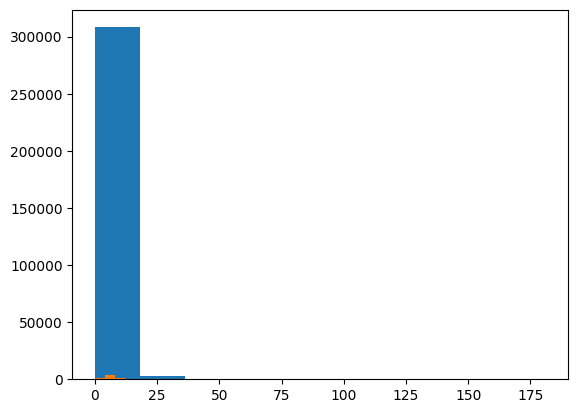

In [17]:
su.get_summary(all_ds)

Samples count where text lengths is greater than 240 tokens: 3570
Samples count where duration is greater than 22s: 810


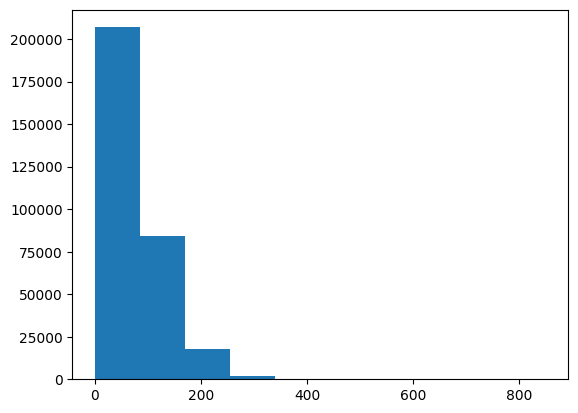

In [18]:
texts = all_ds['train']['text']
text_lens = [len(text) for text in texts]
plt.hist(text_lens)

# count number of samples where lens > 230
count = 0
for l in text_lens:
    if l > 240 or l <= 0:
        count += 1
print(f'Samples count where text lengths is greater than 240 tokens: {count}') # we will filter these samples while training whisper specifying the max tokens count

# count number of samples where duration > 22s
durations = all_ds['train']['duration']
count = 0
for d in durations:
    if d > 22 or d <= 0 :
        count += 1
print(f'Samples count where duration is greater than 22s: {count}') 

DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'duration', 'source', 'speaker_id'],
        num_rows: 311044
    })
    test: Dataset({
        features: ['audio', 'text', 'duration', 'speaker_id', 'source'],
        num_rows: 6050
    })
})
Number of durations samples to remove: 810
Number of text samples to remove: 3570
Number of durations samples to remove: 23
Number of text samples to remove: 14
Dataset summary: 
DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'duration', 'source', 'speaker_id'],
        num_rows: 307297
    })
    test: Dataset({
        features: ['audio', 'text', 'duration', 'speaker_id', 'source'],
        num_rows: 6021
    })
})
train duration in hours: 519.87
test duration in hours: 10.43
Max duration: 21.99299319727891 seconds
Min duration: 0.004988662131519274 seconds
Avg duration: 6.093180192594532 seconds

Max text length: 240 characters
Min text length: 1 characters
Avg text length: 77.9911304170204 charact

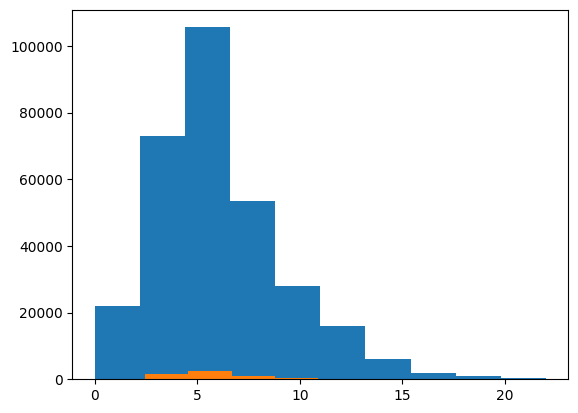

In [19]:
def filter_indexes(ds):
    durations = ds['duration']
    texts = ds['text']
    duration_indexes_to_remove = []
    texts_indexes_to_remove = []
    for i, d in enumerate(durations):
        if d > 22 or d <= 0 : 
            duration_indexes_to_remove.append(i)

        if len(texts[i]) > 240 or len(texts[i]) <= 0:
            texts_indexes_to_remove.append(i)

    print(f"Number of durations samples to remove: {len(duration_indexes_to_remove)}")
    print(f"Number of text samples to remove: {len(texts_indexes_to_remove)}")
    remaining_indexes = [i for i in range(len(durations)) if i not in duration_indexes_to_remove and i not in texts_indexes_to_remove]
    return remaining_indexes

print(all_ds)
all_ds['train'] = all_ds['train'].select(filter_indexes(all_ds['train']))
all_ds['test'] = all_ds['test'].select(filter_indexes(all_ds['test']))
su.get_summary(all_ds)

In [20]:
all_ds.save_to_disk(f'/mnt/sea/speech/punjabi_asr_datasets/{output_ds_name}', num_proc=20)

Saving the dataset (0/112 shards):   0%|          | 0/307297 [00:00<?, ? examples/s]

Saving the dataset (0/20 shards):   0%|          | 0/6021 [00:00<?, ? examples/s]

In [22]:
all_ds.push_to_hub('kdcyberdude/punjabi_asr_dataset_v2')

Uploading the dataset shards:   0%|          | 0/112 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2744 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2743 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/6021 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/61 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/datasets/kdcyberdude/punjabi_asr_dataset_v2/commit/890ebea00a7ca2b88cceee5eb06e9274b32d6de7', commit_message='Upload dataset (part 00002-of-00003)', commit_description='', oid='890ebea00a7ca2b88cceee5eb06e9274b32d6de7', pr_url=None, pr_revision=None, pr_num=None)